In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
print("Dataset Loaded Successfully")
print("Missing Values:") # Check for nulls
print(data.isnull().sum())

Dataset Loaded Successfully
Missing Values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


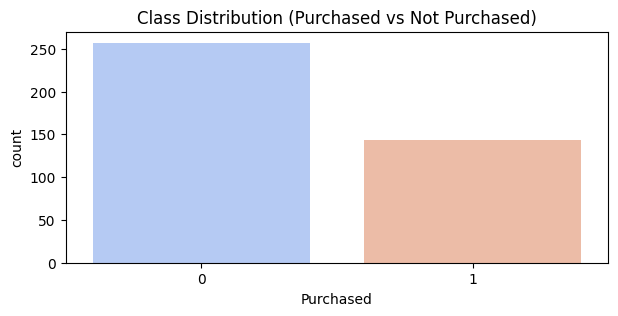

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x='Purchased', data=data, palette='coolwarm', hue='Purchased', legend=False)
plt.title("Class Distribution (Purchased vs Not Purchased)")
plt.show()

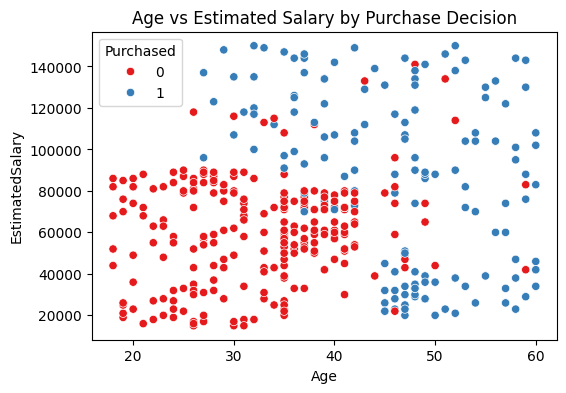

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased',data=data, palette='Set1')
plt.title("Age vs Estimated Salary by Purchase Decision")
plt.show()

In [ ]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("Model Training Complete")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Model Training Complete
Intercept: [-1.03148422]
Coefficients: [[1.92307917 1.07843614]]


In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

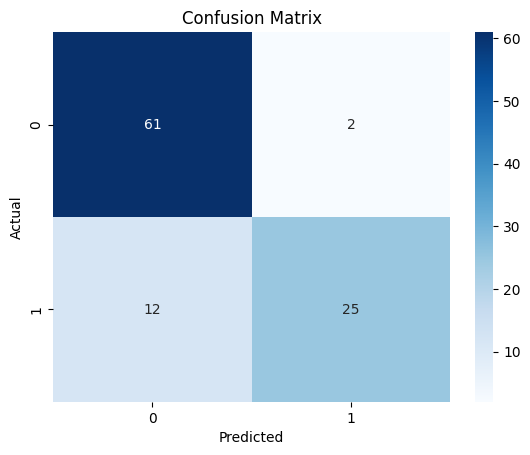


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

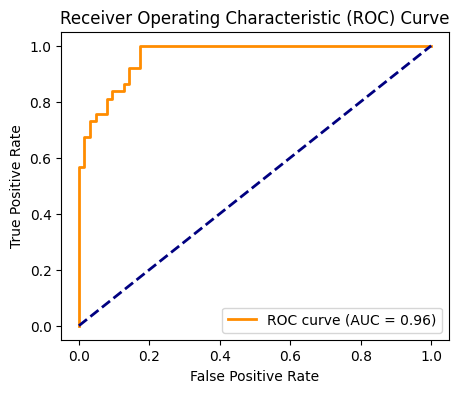

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

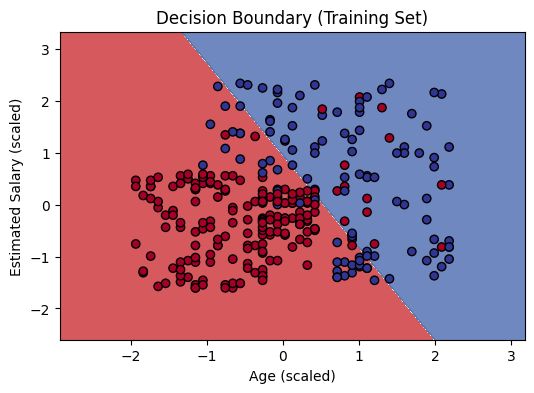

In [ ]:
# Visualize decision boundary
X_set, y_set = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-1, X_set[:, 0].max()+1, 0.01),np.arange(X_set[:, 1].min()-1, X_set[:, 1].max()+1, 0.01))
plt.figure(figsize=(6,4))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=plt.cm.RdYlBu)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set,
cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("Decision Boundary (Training Set)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()

The **Confusion Matrix** and **Classification Report** (from the previous output) indicate that the Logistic Regression model performs reasonably well in classifying purchased vs. not purchased. The model achieved an accuracy of 86%, with a balanced precision and recall for both classes, especially for the 'not purchased' class (class 0).
The **ROC Curve** (Receiver Operating Characteristic) further validates the model's performance, showing an Area Under the Curve (AUC) of approximately 0.96. An AUC value close to 1 suggests that the model has a high ability to distinguish between the positive and negative classes.
Finally, the **Decision Boundary** plot visualizes how the Logistic Regression model separates the two classes (Purchased vs. Not Purchased) based on the scaled 'Age' and 'Estimated Salary' features. The colored regions represent the areas where the model predicts each class. The line separating these regions is the decision boundary. We can observe that as age and estimated salary increase, the likelihood of purchasing the product also increases, which is consistent with the model's coefficients.